# Spectrogram, Applied To Birdsong

Sound analysis is often carried out in one of 2 methods, through time or frequency. They both work equally as well. 

A spectrogram is a good representation of sound because it is a spectrum of frequencies of a signal as it varies with time. With spectrograms frequency is represented on Y axis and time on X axis. 

Spectrograms are useful when analysing sounds because it allows us to clearly distinguish each of the sound elements and apply processes to very specific frequency and time ranges.

Spectrogram reveal unwanted noises and ability to remove them. Spectrograms are computed using the Short Time Fourier Transform.

## DFT - Discrete Fourier Transform

# ${X}[k] = \sum \limits _{n=0} ^{N-1} {x}[n]{e}^{{-j}\frac{2\pi}{N}{k}{n}}$

DFT allows us to switch to the frequency domain from the time domain and enables us to find the spectrum of a finite-duration signal.
<div>
<img src="DFTexample.png" width="400"/>
</div>

In Fig 1 there is a 5Hz sine wave sampled at 12Hz. (At least twice input frequency to avoid aliasing) 
 <br></br>
In the frequency domain plot we can clearly see peak value of 5Hz with a magnitude of 6 while all other frequencies stay around zero.
<br></br>

## STFT - Short Time Fourier Transform

To compute the STFT of a signal you have to divide a signal into segments of equal lengths and perform discrete fourier transform on each segment. Doing this we can focus on signal properties at a particular point in time.


# Library Imports

First we import libraries Numpy and Scipy. NumPy and SciPy are mostly written in C and wrapped in Python for ease of use. Numpy performs basic operations such as sorting and indexing. SciPy performs more complex operations such as various numerical algorithms and algebraic functions. SciPy is used in the program to read in a wavfile and filter the signal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile


numpy.seterr - Turns off "RuntimeWarning: divide by zero" due to some elements in the spec_db_sp array ending up being zero.

In [2]:
np.seterr(divide = 'ignore')


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

wavfile.read - Reads in wav file to a numpy array of data type integer. [1]

In [3]:
rate, audio = wavfile.read('Blackbird.wav')


np.mean - Returns average of the array elements. Returns new array with optional data type and defaults to float.[2] N is total number of samples and L which is number of samples divided by sample rate, output to screen in seconds. np.mean is commented out because the audio file is mono.

In [4]:
#audio = np.mean(audio, axis=1)

N = audio.shape[0]              
L = N / rate                  
print(f'Audio length: {L:.2f} seconds')


Audio length: 34.62 seconds


<br></br>
<br></br>
<br></br>
signal.spectrogram - Computes a spectrogram, returns the short-time Fourier transform of the input signal. [3]

In [5]:
freqs_sp, times_sp, spec_sp = signal.spectrogram(audio, fs=rate, window='hanning',
                                                 nperseg=1024, noverlap=1024-100,
                                                 detrend=False, scaling='spectrum')


spec_db_sp - Calculates the magnitude of the spectrum in decibels. Inputs an array of values and returns an array of log to base10 of each element.

In [6]:
spec_db_sp = 10*np.log10(spec_sp)



# Time-Domain Signal

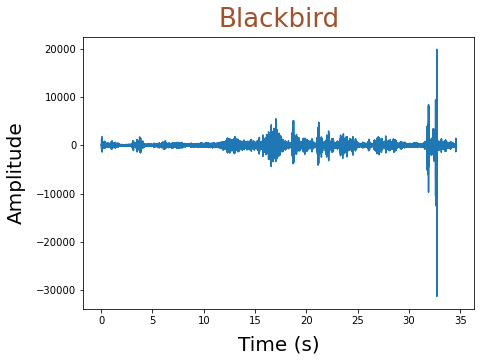

In [7]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
ax.plot(np.arange(N) / rate, audio)
#ax.plot(rate, audio)
ax.set_title('Blackbird', fontsize=26, pad=10, color='sienna');
ax.set_xlabel('Time (s)', fontsize=20, labelpad=10)
ax.set_ylabel('Amplitude', fontsize=20, labelpad=10);

# Spectrogram

The pcolormesh() function in pyplot module of matplotlib library is used to create a pseudo colour plot with a non-regular rectangular grid. [4] We then plot the spectrogram with frequency on y axis and time on x axis. To increase frequency range we lowered power that sets the range of colorbar by adjusting Vmin.

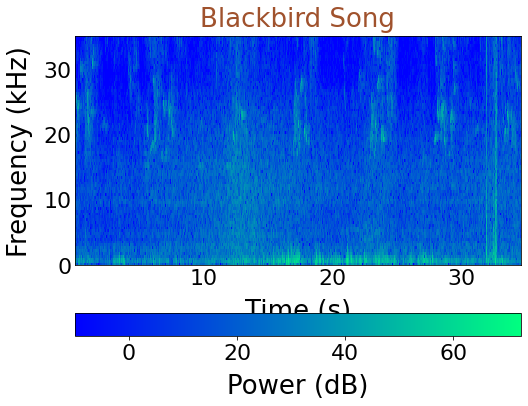

In [8]:
fig, ax = plt.subplots(figsize=(8,6))
im = ax.pcolormesh(times_sp, freqs_sp/100, spec_db_sp, vmax=spec_db_sp.max(), vmin=-10, cmap=plt.cm.winter, linewidth=10,shading='auto')

cb = fig.colorbar(im, ax=ax, orientation="horizontal")
ax.set_ylabel('Frequency (kHz)', fontsize=26, labelpad=10)
ax.set_xlabel('Time (s)', fontsize=26, labelpad=10);
ax.set_title('Blackbird Spectrogram', fontsize=26, pad=10, color='sienna');
ax.set_title('Blackbird Song', fontsize=26, pad=10, color='sienna');
ax.set_ylim(0, 35)
ax.tick_params(axis='both', which='both', labelsize=22, length=0)
cb.set_label('Power (dB)', fontsize=26, labelpad=10)
cb.ax.tick_params(labelsize=22)


As is demonstrated in plots the time and frequency do coincide when there is activity. This is especially visible between frequencies 15kHz and 25kHz where most activity happens.
<br></br>
<br></br>
<br></br>

<div>
<img src="otherTests.png" width="700"/>
</div>



To confirm similarities I analyzed 2 other birdsongs by passing through the program. Again time and frequency activity coincides. Most of our sound for both birds is in range 30kHz to 50kHz. In order to get clear readings with the higher frequencies power had to be decreased substantially especially on Eurasian Wren song.

## Prewitt filter 

Used Prewitt filter to enhance the edges in the vertical direction on blackbird spectrogram to give a more in depth and clearer image. We do this by adding a kernel in front of the image.

In [9]:
import cv2 as cv
image = cv.imread('birdsong.png', cv.IMREAD_COLOR)
kernel = np.array([[1, 0 , -1],
                    [1, 0 , -1],
                    [1, 0 ,-1]])
image_gray = cv.cvtColor(image, cv.COLOR_BGR2BGRA)
image_lines = cv.filter2D(image_gray, -5, kernel)
stack = np.hstack((image_gray, image_lines))
cv.imshow('Prewitt Operator, Vertical', stack)
cv.waitKey(0)

-1

<br></br>
<br></br>
<br></br>
<br></br>

<h1>References</h1>

[1] wavfile.read https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

[2] np.mean https://numpy.org/doc/stable/reference/generated/numpy.mean.html

[3] signal.spectrogram https://docs.scipy.org/doc/scipy/reference/signal.html#spectral-analysis

[4] pcolormesh function https://www.geeksforgeeks.org/matplotlib-pyplot-pcolormesh-in-python/





